#**Bankruptcy Prevention System**

Problem Statement
  
Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.


  


Importing libraries

In [314]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [315]:
df = pd.read_csv("bankruptcy-prevention.csv", sep =';')
#loading data and use seperator for seperate the columns

In [316]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


The data file contains 7 features about 250 companies

The data set includes the following variables:
industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
class: bankruptcy, non-bankruptcy (target variable).


In [317]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [318]:
df= df.rename({' management_risk': 'management risk',' financial_flexibility':'financial flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating risk',' class':'class'}, axis=1)
df.columns

Index(['industrial_risk', 'management risk', 'financial flexibility',
       'credibility', 'competitiveness', 'operating risk', 'class'],
      dtype='object')

# Exploratory Data Analysis

In [319]:
df.head(5)

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [320]:
df.tail(5)

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [321]:
df.nunique()

industrial_risk          3
management risk          3
financial flexibility    3
credibility              3
competitiveness          3
operating risk           3
class                    2
dtype: int64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management risk        250 non-null    float64
 2   financial flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [323]:
df.shape

(250, 7)

**Checking data types**

In [324]:
df.dtypes

industrial_risk          float64
management risk          float64
financial flexibility    float64
credibility              float64
competitiveness          float64
operating risk           float64
class                     object
dtype: object

Data Type Conversion

In [325]:
df[df['class']=="bankruptcy"]

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
102,1.0,1.0,0.5,0.0,0.0,1.0,bankruptcy
103,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
104,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
105,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [326]:
df[df['class']=="non-bankruptcy"]

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
107,0.0,0.0,0.5,0.5,0.5,0.0,non-bankruptcy
108,1.0,1.0,0.5,0.5,0.5,1.0,non-bankruptcy
109,0.5,0.5,0.5,0.5,0.5,0.5,non-bankruptcy
110,0.0,0.0,1.0,1.0,1.0,0.0,non-bankruptcy
111,1.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [327]:
df["class"] = df["class"].replace("bankruptcy",0)
df["class"] = df["class"].replace("non-bankruptcy",1)

In [328]:
df

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [329]:
df.value_counts('class') 

class
1    143
0    107
dtype: int64

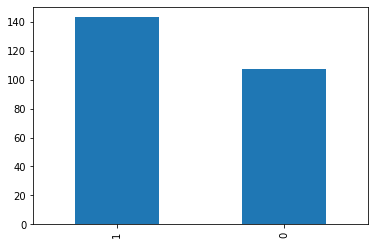

In [330]:
df['class'].value_counts().plot.bar()

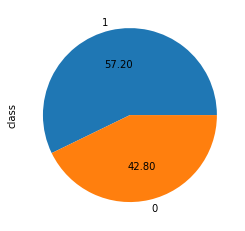

In [331]:
df['class'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [332]:
df.dtypes

industrial_risk          float64
management risk          float64
financial flexibility    float64
credibility              float64
competitiveness          float64
operating risk           float64
class                      int64
dtype: object

Converted Class data type object to int

**Null values**

In [333]:
df.isnull()

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [334]:
df.isnull().sum()

industrial_risk          0
management risk          0
financial flexibility    0
credibility              0
competitiveness          0
operating risk           0
class                    0
dtype: int64

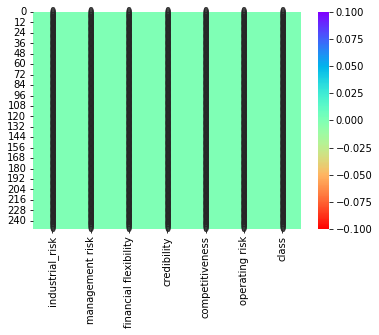

In [335]:
sns.heatmap(df.isnull(), annot = True , cmap = 'rainbow_r')

In given dataset, their is no any null values

**Duplicate Values**

In [336]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [337]:
df[df.duplicated()]

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,0
13,1.0,1.0,0.0,0.0,0.0,1.0,0
15,0.5,1.0,0.0,0.0,0.0,0.5,0
16,0.5,1.0,0.0,0.0,0.0,0.5,0
18,0.5,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [338]:
df[df.duplicated()].shape

(147, 7)

There are 147 duplicate values are present in dataset.

comapnies may have same values so we can't drop them

#outlier Detection

In [339]:
df.head(5)

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [340]:
df.describe(percentiles=[0.10,0.20,0.90,0.99,0.995])

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
90%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99.5%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
df[	"industrial_risk"].describe(percentiles=[0.10,0.20,0.90,0.99,0.995])

count    250.000000
mean       0.518000
std        0.411526
min        0.000000
10%        0.000000
20%        0.000000
50%        0.500000
90%        1.000000
99%        1.000000
99.5%      1.000000
max        1.000000
Name: industrial_risk, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94bc823dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94bc823a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94bc823fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94d13bf430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94d13bf850>],
 'means': []}

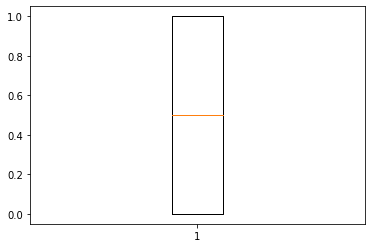

In [342]:
data_box=df
plt.boxplot(data_box.industrial_risk)

#Visualization

In [343]:
df.value_counts('management risk') 

management risk
1.0    119
0.5     69
0.0     62
dtype: int64

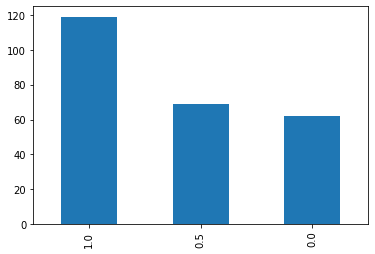

In [344]:
df['management risk'].value_counts().plot.bar()

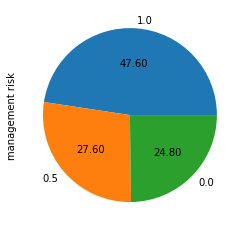

In [345]:
df['management risk'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [346]:
df.value_counts('financial flexibility') 

financial flexibility
0.0    119
0.5     74
1.0     57
dtype: int64

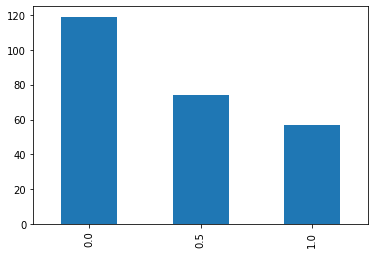

In [347]:
df['financial flexibility'].value_counts().plot.bar()

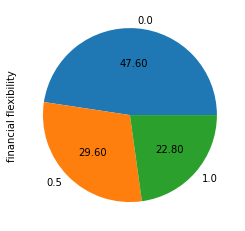

In [348]:
df['financial flexibility'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [349]:
df.value_counts('credibility') 

credibility
0.0    94
1.0    79
0.5    77
dtype: int64

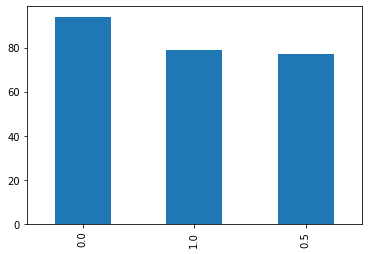

In [350]:
df['credibility'].value_counts().plot.bar()

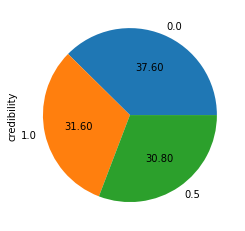

In [351]:
df['credibility'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [352]:
df.value_counts('competitiveness') 

competitiveness
0.0    103
1.0     91
0.5     56
dtype: int64

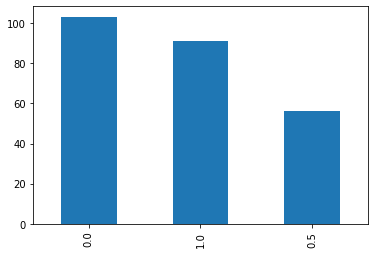

In [353]:
df['competitiveness'].value_counts().plot.bar()

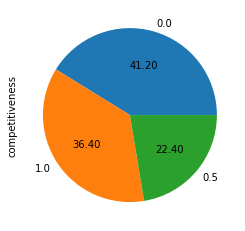

In [354]:
df['competitiveness'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [355]:
df.value_counts('operating risk') 

operating risk
1.0    114
0.0     79
0.5     57
dtype: int64

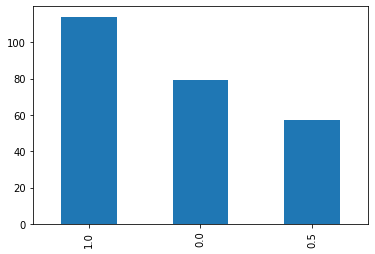

In [356]:
df['operating risk'].value_counts().plot.bar()

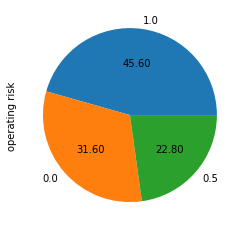

In [357]:
df['operating risk'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

# Scatter plot and Correlation analysis

scatter plot

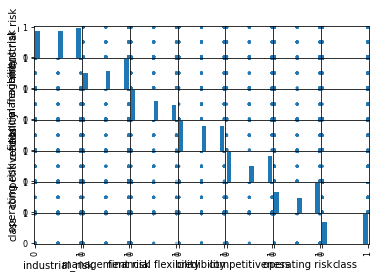

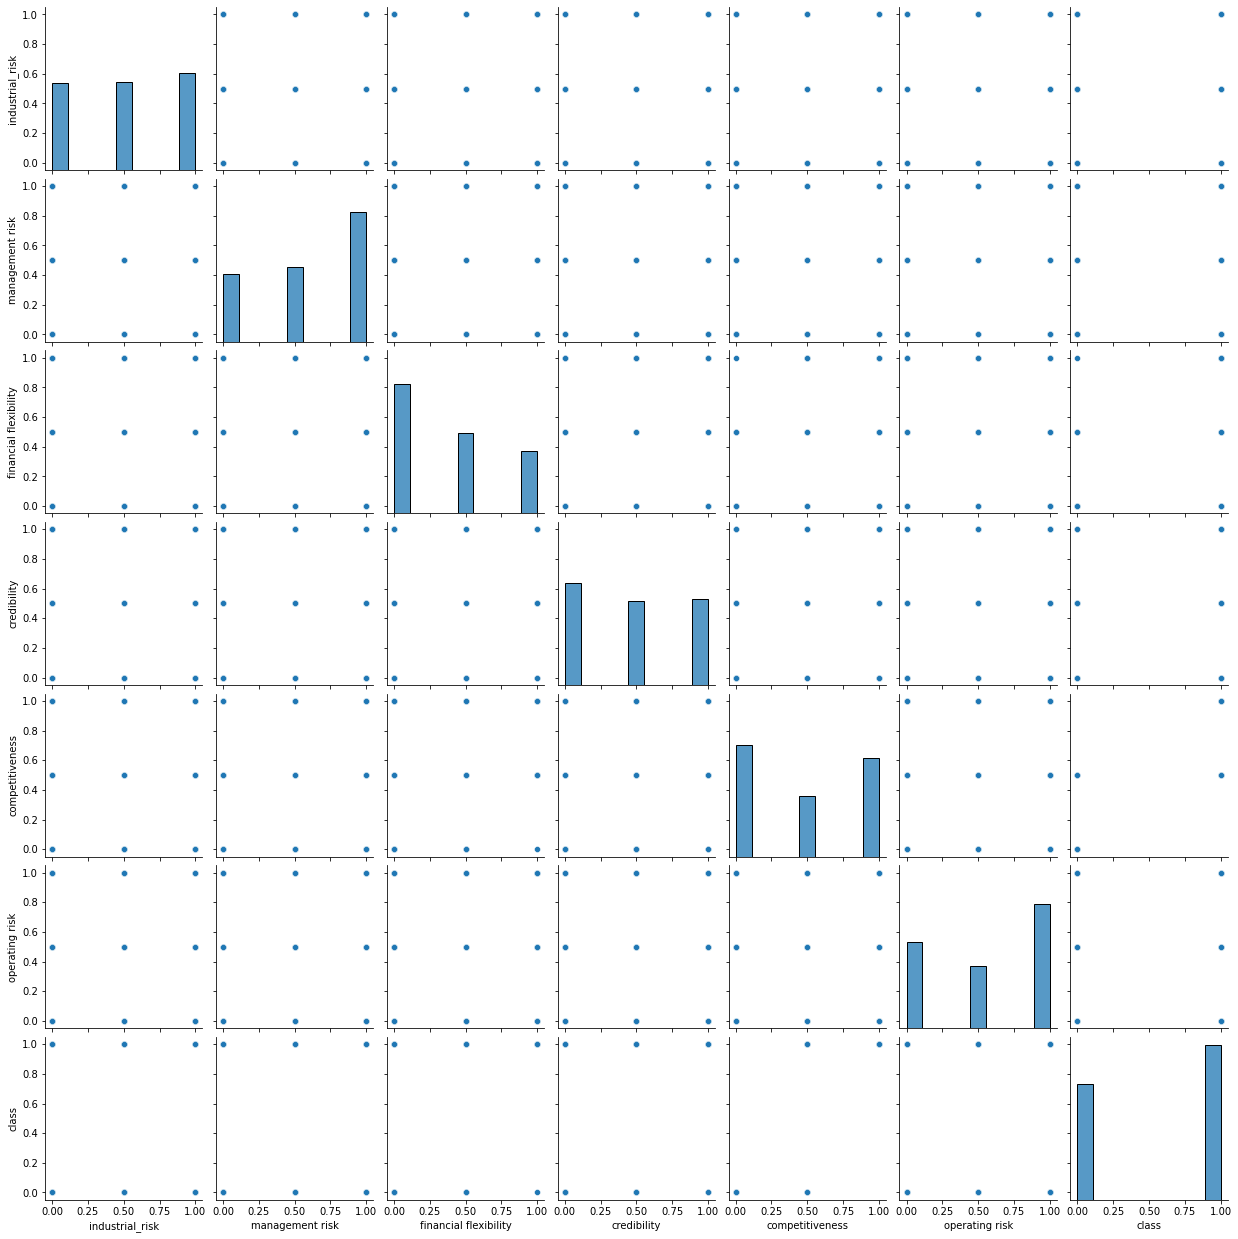

In [358]:
pd.plotting.scatter_matrix(df)
sns.pairplot(df)

In [359]:
df.corr()

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [360]:
#Correlation
Correlation=df.corr()

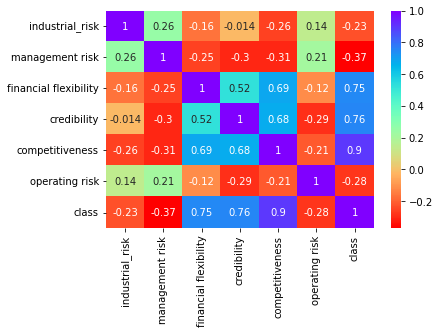

In [361]:
sns.heatmap(Correlation, annot = True , cmap = 'rainbow_r')


### Model Building

__Let's create multiple models one by one then we will cross_validate one by one to avoid Overfiting and Underfiting.
Then will pick 2 algorithms with the best accuracy and improve accuracy of the particular algorithm using hyperparameter tuning__

In [362]:
# Importing Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [363]:
df.head()

,industrial_risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [364]:
# Converting dataframe into array
data = df.values
data

array([[0.5, 1. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 1. , 0. , ..., 0. , 1. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 1. , 1. , ..., 0.5, 0. , 1. ],
       [1. , 0. , 0.5, ..., 0.5, 0. , 1. ],
       [1. , 0. , 0.5, ..., 1. , 1. , 1. ]])

In [365]:
# Selecting Target 
X=data[:,0:6]
Y=data[:,6]
print(X.shape,Y.shape)

(250, 6) (250,)


In [366]:
X

array([[0.5, 1. , 0. , 0. , 0. , 0.5],
       [0. , 1. , 0. , 0. , 0. , 1. ],
       [1. , 0. , 0. , 0. , 0. , 1. ],
       ...,
       [0. , 1. , 1. , 0.5, 0.5, 0. ],
       [1. , 0. , 0.5, 1. , 0.5, 0. ],
       [1. , 0. , 0.5, 0.5, 1. , 1. ]])

In [367]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [368]:
# Data Split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(175, 6) (175,) (75, 6) (75,)


In [369]:
# Creating empty list for accuracy
acc = []
model = []

### 1.Logistic Regression

In [370]:
lg = LogisticRegression()

lg.fit(x_train, y_train)

pred_lg = lg.predict(x_test)

print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

lg_scores = cross_val_score(lg, X, Y, cv = 10)# cross validating the model
print("\n")
print(lg_scores)
# accuracy scores of each cross validation cycle
print(f"\nMean of accuracy score for Logistic Regression is {lg_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_lg)
acc.append(x)
model.append('lg')

Accuracy Score of Logistic Regression model is 100.0


[1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]

Mean of accuracy score for Logistic Regression is 99.60000000000001



In [371]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [372]:
confusion_matrix(y_test, pred_lg)

array([[25,  0],
       [ 0, 50]])

### 2.DecisionTreeClassifier

In [373]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

dtc_scores = cross_val_score(dtc, X, Y, cv = 10)
print("\n")
print(dtc_scores)
print(f"\nMean of accuracy score for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_dtc)
acc.append(x)
model.append('dtc')

Accuracy Score of Decision Tree Classifier model is 98.66666666666667


[1.   1.   1.   1.   1.   1.   0.92 1.   1.   1.  ]

Mean of accuracy score for Decision Tree Classifier is 99.2



In [374]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [375]:
confusion_matrix(y_test, pred_dtc)

array([[25,  0],
       [ 1, 49]])

### 3.KNN algorithm

In [376]:
knc = KNeighborsClassifier(n_neighbors = 5)

knc.fit(x_train, y_train)

pred_knc = knc.predict(x_test)

print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

knc_scores = cross_val_score(knc, X, Y, cv = 10)
print("\n")
print(knc_scores)
print(f"\nMean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_knc)
acc.append(x)
model.append('knc')

Accuracy Score of K-Nearest Neighbour Classifier model is 98.66666666666667


[1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]

Mean of accuracy scores is for KNN Classifier is 99.60000000000001



In [377]:
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [378]:
confusion_matrix(y_test, pred_knc)

array([[25,  0],
       [ 1, 49]])

### 4.SVC

In [379]:
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

svc_scores = cross_val_score(svc, X, Y, cv = 10)
print("\n")
print(svc_scores)
print(f"\nMean of accuracy scores for SVC Classifier is {svc_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_svc)
acc.append(x)
model.append('svc')

Accuracy Score of Support Vector Classifier model is 100.0


[1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]

Mean of accuracy scores for SVC Classifier is 99.60000000000001



In [380]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [381]:
confusion_matrix(y_test, pred_svc)

array([[25,  0],
       [ 0, 50]])

### 5.Random Forest

In [382]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

pred_rfc = rfc.predict(x_test)

print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

rfc_scores = cross_val_score(rfc, X, Y, cv = 10)
print("\n")
print(rfc_scores)
print(f"\nMean of accuracy scores for Random Forest Classifier is {rfc_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_rfc)
acc.append(x)
model.append('rfc')

Accuracy Score of Random Forest model is 100.0


[1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]

Mean of accuracy scores for Random Forest Classifier is 99.60000000000001



In [383]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [384]:
confusion_matrix(y_test, pred_rfc)

array([[25,  0],
       [ 0, 50]])

### 6.MultinominalNB

In [385]:
nb = MultinomialNB()

nb.fit(x_train, y_train)

pred_nb = nb.predict(x_test)

print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

nb_scores = cross_val_score(nb, X, Y, cv = 10)
print("\n")
print(nb_scores)
print(f"\nMean of accuracy scores for MultinomialNB is {nb_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_nb)
acc.append(x)
model.append('nb')

Accuracy Score of MultinomialNB model is 100.0


[1.   0.96 1.   0.96 0.92 1.   0.96 1.   1.   0.96]

Mean of accuracy scores for MultinomialNB is 97.60000000000002



In [386]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [387]:
confusion_matrix(y_test, pred_nb)

array([[25,  0],
       [ 0, 50]])

### 7.GaussianNB

In [388]:
gb = GaussianNB()

gb.fit(x_train,y_train)

pred_gb = gb.predict(x_test)

print("Accuracy of GaussianNB model is",accuracy_score(y_test,pred_gb)*100)

gb_scores = cross_val_score(gb,X,Y,cv = 10)
print("\n")
print(nb_scores)
print(f"\nMean of accureacy score for GaussianNB is {gb_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_gb)
acc.append(x)
model.append('gb')

Accuracy of GaussianNB model is 100.0


[1.   0.96 1.   0.96 0.92 1.   0.96 1.   1.   0.96]

Mean of accureacy score for GaussianNB is 97.19999999999999



In [389]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [390]:
confusion_matrix(y_test, pred_gb)

array([[25,  0],
       [ 0, 50]])

### 8.Adaboost Classifire

In [391]:
ada= AdaBoostClassifier()

ada.fit(x_train, y_train)

pred_ada = ada.predict(x_test)

print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

ada_scores = cross_val_score(ada,X,Y,cv=10)
print("\n")
print(ada_scores)
print(f"\nMean of accureacy score for GaussianNB is {ada_scores.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_ada)
acc.append(x)
model.append('ada')

Accuracy Score of ADA Boost model is 98.66666666666667


[1.   1.   1.   1.   1.   1.   0.92 1.   1.   1.  ]

Mean of accureacy score for GaussianNB is 99.2



In [392]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [393]:
confusion_matrix(y_test, pred_ada)

array([[25,  0],
       [ 1, 49]])

### 9.Xgboost

In [394]:
xb = XGBClassifier()

xb.fit(x_train,y_train)

pred_xb = xb.predict(x_test)

print("Accuracy Score of Xgboost model is", accuracy_score(y_test, pred_xb)*100)

xb_score = cross_val_score(xb,X,Y,cv=10)
print("\n")
print(xb_score)
print(f"\nMean of accuracy score for Xgboost is {xb_score.mean()*100}\n")

x = metrics.accuracy_score(y_test, pred_xb)
acc.append(x)
model.append('xb')

Accuracy Score of Xgboost model is 98.66666666666667


[1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]

Mean of accuracy score for Xgboost is 99.60000000000001



In [395]:
print(classification_report(y_test, pred_xb))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [396]:
confusion_matrix(y_test, pred_xb)

array([[25,  0],
       [ 1, 49]])

### 10.ANN


In [397]:
from tensorflow import keras
from tensorflow.keras import layers
ANN1= keras.Sequential()
ANN1.add(tf.keras.layers.Dense(20, input_dim=6,  activation='relu')) #1st layer or input layer
ANN1.add(tf.keras.layers.Dense(10,  activation='relu')) #2nd layer
ANN1.add(tf.keras.layers.Dense(10,  activation='relu')) #3nd layer
ANN1.add(tf.keras.layers.Dense(1, activation='sigmoid')) #4rd layer or output layer

In [398]:
# Compile model
ANN1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [399]:
ANN1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_408 (Dense)           (None, 20)                140       
                                                                 
 dense_409 (Dense)           (None, 10)                210       
                                                                 
 dense_410 (Dense)           (None, 10)                110       
                                                                 
 dense_411 (Dense)           (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [400]:
# Fit the model
history = ANN1.fit(X, Y, validation_split=0.30, epochs= 250, batch_size=6)

Epoch 1/250
30/30 [==============================] - 1s 9ms/step - loss: 0.6751 - accuracy: 0.6114 - val_loss: 0.7315 - val_accuracy: 0.0000e+00
Epoch 2/250
30/30 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6114 - val_loss: 0.7355 - val_accuracy: 0.0267
Epoch 3/250
30/30 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.6171 - val_loss: 0.7479 - val_accuracy: 0.0667
Epoch 4/250
30/30 [==============================] - 0s 4ms/step - loss: 0.5008 - accuracy: 0.7257 - val_loss: 0.7369 - val_accuracy: 0.5600
Epoch 5/250
30/30 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8857 - val_loss: 0.6700 - val_accuracy: 0.8667
Epoch 6/250
30/30 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.9314 - val_loss: 0.5821 - val_accuracy: 0.8933
Epoch 7/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9543 - val_loss: 0.4643 - val_accuracy: 0.9467
Epoch 8/2

In [401]:
scores = ANN1.evaluate(X, Y)
print( scores[1]*100)

8/8 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
100.0


In [402]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

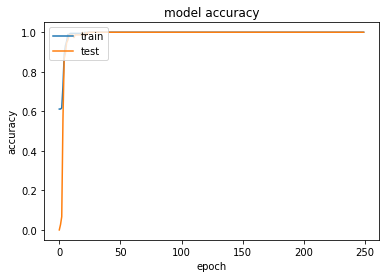

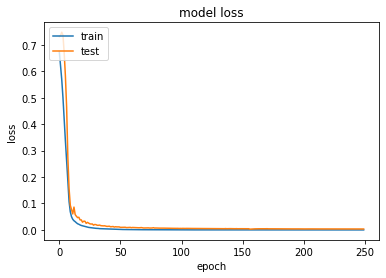

In [403]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [404]:
x=scores[1]

In [405]:
acc.append(x)
model.append('ANN1')

### Accuracy Comparison

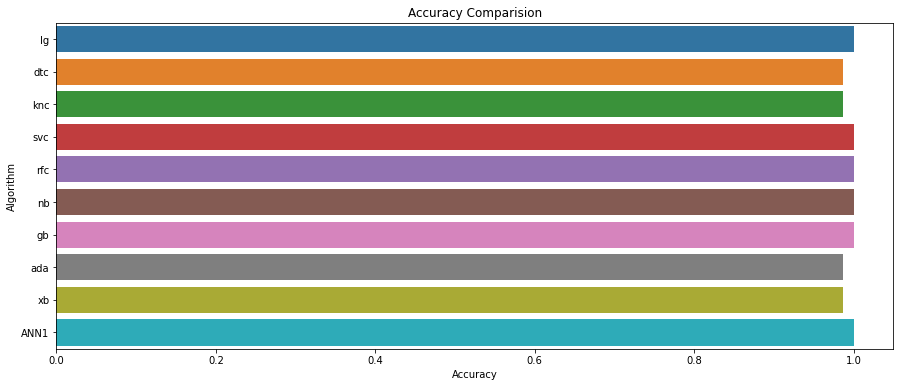

In [406]:
plt.figure(figsize=(15,6))
plt.title("Accuracy Comparision")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
sns.barplot(x= acc,y=model)

In [407]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '=', v)

lg = 1.0
dtc = 0.9866666666666667
knc = 0.9866666666666667
svc = 1.0
rfc = 1.0
nb = 1.0
gb = 1.0
ada = 0.9866666666666667
xb = 0.9866666666666667
ANN1 = 1.0


__Choosing ANN and SVC as final models based on their high accuracy.__

__Hyper Parameter Tuning of SVC__

In [408]:
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = [{'kernel':['rbf','poly'],'gamma':[50,5,10,0.5],'C':[12,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=50)
gsv.fit(x_train,y_train)


GridSearchCV(cv=50, estimator=SVC(),
             param_grid=[{'C': [12, 10, 0.1, 0.001], 'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'poly']}])

In [409]:
gsv.best_estimator_

SVC(C=12, gamma=0.5)

In [410]:

svc = SVC(kernel="rbf",C=12,gamma=0.5)
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)


Accuracy Score of Support Vector Classifier model is 100.0


In [411]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [412]:
confusion_matrix(y_test, pred_svc)

array([[25,  0],
       [ 0, 50]])

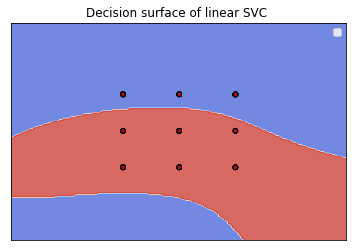

In [413]:
import matplotlib.pyplot as plt

X=data[:,:2]
y=data[:,6]

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel="rbf",C=12,gamma=0.5)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

__Tuning of Hyperparameters for ANN__

In [414]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [415]:
# Standardization

X=data[:,0:6]
Y=data[:,6]
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [416]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

In [417]:
# create model
def create_model():
    M1 = Sequential(name='Hypterparameter-Tuning-Dummy')
    M1.add(Dense(12, input_dim=6, kernel_initializer='uniform', activation='relu'))
    M1.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    M1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    M1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return M1

In [418]:
# Create the model
M2 = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [4,5,6]
epochs = [50,100,150,250]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = M2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=4, epochs=50....................................
[CV 1/5; 1/12] END .....batch_size=4, epochs=50;, score=1.000 total time=   3.8s
[CV 2/5; 1/12] START batch_size=4, epochs=50....................................
[CV 2/5; 1/12] END .....batch_size=4, epochs=50;, score=0.980 total time=   6.1s
[CV 3/5; 1/12] START batch_size=4, epochs=50....................................
[CV 3/5; 1/12] END .....batch_size=4, epochs=50;, score=1.000 total time=   3.8s
[CV 4/5; 1/12] START batch_size=4, epochs=50....................................
[CV 4/5; 1/12] END .....batch_size=4, epochs=50;, score=0.960 total time=   3.5s
[CV 5/5; 1/12] START batch_size=4, epochs=50....................................
[CV 5/5; 1/12] END .....batch_size=4, epochs=50;, score=1.000 total time=   5.9s
[CV 1/5; 2/12] START batch_size=4, epochs=100...................................
[CV 1/5; 2/12] END ....batch_size=4, epochs=100;

In [419]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9920000076293946, using {'batch_size': 4, 'epochs': 100}
0.9879999995231629,0.01600000560284077 with: {'batch_size': 4, 'epochs': 50}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 4, 'epochs': 100}
0.7960000038146973,0.3980753715112361 with: {'batch_size': 4, 'epochs': 150}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 4, 'epochs': 250}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 5, 'epochs': 50}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 5, 'epochs': 100}
0.9879999995231629,0.01600000560284077 with: {'batch_size': 5, 'epochs': 150}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 5, 'epochs': 250}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 6, 'epochs': 50}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 6, 'epochs': 100}
0.9879999995231629,0.01600000560284077 with: {'batch_size': 6, 'epochs': 150}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 6, 'epochs':

Result for best param 

In [420]:
ANN2= keras.Sequential()
ANN2.add(tf.keras.layers.Dense(20, input_dim=6,  activation='relu')) #1st layer or input layer
ANN2.add(tf.keras.layers.Dense(10,  activation='relu')) #2nd layer
ANN2.add(tf.keras.layers.Dense(10,  activation='relu')) #3nd layer
ANN2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #4rd layer

In [421]:
# Compile model
ANN2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [422]:
ANN2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_595 (Dense)           (None, 20)                140       
                                                                 
 dense_596 (Dense)           (None, 10)                210       
                                                                 
 dense_597 (Dense)           (None, 10)                110       
                                                                 
 dense_598 (Dense)           (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [434]:
# Fit the model
history2 = ANN2.fit(X, Y, validation_split=0.30, epochs= 50, batch_size=4)

Epoch 1/50
44/44 [==============================] - 0s 3ms/step - loss: 6.1731e-05 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 5.9457e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 5.7827e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 5.6134e-05 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 5.4445e-05 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 5.2274e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 5.1201e-05 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy:

In [435]:
scores = ANN2.evaluate(X, Y)
print( scores[1]*100)

8/8 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
100.0


In [436]:
# Visualize training history

# list all data in history
history2.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

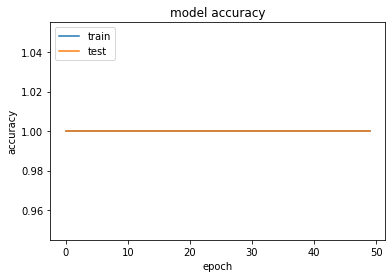

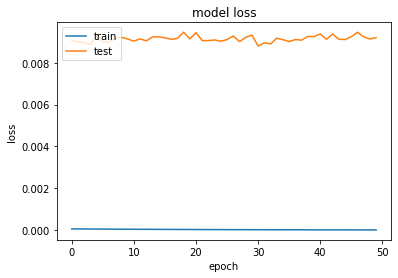

In [437]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
